<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 7.데이터프레임 변경 (3)

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## 7.1. 데이터프레임 합치기(Concat)

- **concat()** 함수를 사용해 **인덱스 값을 기준으로** 두 데이터프레임을 가로 또는 세로로 합칠 수 있습니다.

- 가로합치기 : 인덱스값기준 axis=1 / 세로합치기 : 열이름 기준 axis=0

### 7.1.1.가로로 합치기

- **axis=1** 옵션을 지정해 가로로 합칠 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax1.png' width=500, align="left"/>

In [4]:
type(np.nan)

float

**1) 데이터 읽어오기**

In [9]:
# 서울 인구정보 읽어오기 #1 한국인
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path, index_col='year')
pop01.index.name = None # 공백안주려고

# 확인
pop01.head(10)

,k_male,k_female
1981,4160,4191
1982,4160,4191
1983,4160,4191
1984,4160,4191
1985,4160,4191
1986,4899,4888
1987,5000,4979
1988,5156,5120
1989,5305,5261
1990,5321,5282


In [3]:
# 서울 인구정보 읽어오기 #2 외국인
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path, index_col='year')
pop02.index.name = None

# 확인
pop02.head(10)

,f_male,f_female
1985,7,6
1986,7,5
1987,6,5
1988,5,5
1989,6,5
1990,5,4
1991,18,14
1992,19,16
1993,19,17
1994,21,19


**2) 데이터프레임 합치기**

- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 가로로 합치므로 **axis=1** 옵션을 지정합니다.
- join='outer'는 기본 옵션값이므로 생략이 가능합니다.

In [12]:
# 모든 헹 합치기
pop = pd.concat([pop01, pop02], axis=1, join='outer') #★

# 확인
pop.head(10)

,k_male,k_female,f_male,f_female
1981,4160,4191,NaN,NaN
1982,4160,4191,NaN,NaN
1983,4160,4191,NaN,NaN
1984,4160,4191,NaN,NaN
1985,4160,4191,7.0,6.0
1986,4899,4888,7.0,5.0
1987,5000,4979,6.0,5.0
1988,5156,5120,5.0,5.0
1989,5305,5261,6.0,5.0
1990,5321,5282,5.0,4.0


- pop02 데이터프레임에는 1981~1984년 데이터가 없어 합쳐진 결과에 결측치가 생깁니다.
- join='inner' 옵션을 지정하면 매핑되지 못한 행은 제외됩니다.

In [ ]:
# 모든 헹 합치기
pop = pd.concat([pop01, pop02], axis=1, join='inner') #★


# 확인
pop.head(10)

### 7.1.2.세로로 합치기


- **axis=0** 옵션을 지정해 세로로 합칠 수 있습니다.(기본값)

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax0.png' width=450, align="left"/>

**1) 데이터 읽어오기**


In [13]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head()

,year,k_male,k_female,f_male,f_female
0,1985,4788,4838,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5


In [16]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(10)

,year,k_male,k_female,f_male,f_female
0,2001,5142,5122,34,34
1,2002,5109,5098,36,37
2,2003,5085,5089,49,54
3,2004,5075,5098,54,61
4,2005,5062,5105,61,68
5,2006,5062,5119,83,92
6,2007,5063,5130,111,118
7,2008,5062,5139,123,132
8,2009,5059,5149,122,134
9,2010,5111,5201,125,137


**2) 데이터프레임 합치기**

- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 세로로 합치므로 **axis=0** 옵션을 지정하거나 생략합니다.

In [18]:
# 모든 행 합치기
pop = pd.concat([pop01,pop02], axis=0, join='outer')

# 확인
pop

,year,k_male,k_female,f_male,f_female
0,1985,4788,4838,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


- 세로로 합해지면 인덱스 값이 중복될 수 있으므로 인덱스를 초기화합니다.

In [20]:
# 인덱스 초기화
pop.reset_index(drop=False ,inplace=True)

# 확인
pop

,index,year,k_male,k_female,f_male,f_female
0,0,1985,4788,4838,7,6
1,1,1986,4899,4888,7,5
2,2,1987,5000,4979,6,5
3,3,1988,5156,5120,5,5
4,4,1989,5305,5261,6,5
5,5,1990,5321,5282,5,4
6,6,1991,5468,5405,18,14
7,7,1992,5500,5435,19,16
8,8,1993,5478,5412,19,17
9,9,1994,5409,5351,21,19


**3) 참고: 인구 변화량 시각화**

- 인구 변화량을 간단히 시각화 해봅니다.

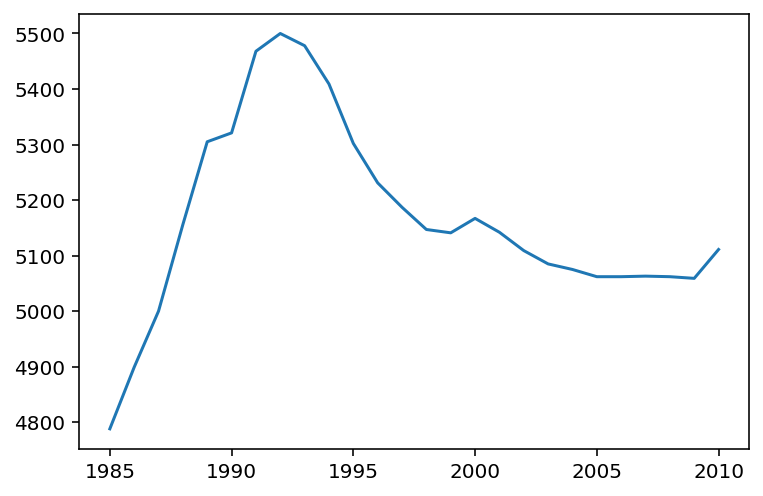

In [25]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 시각화
plt.plot(pop['year'], pop['k_male'])
plt.show()

- y축에 여러 값을 표시할 수 있습니다. 이때는 범례를 표시하는 것이 좋습니다.

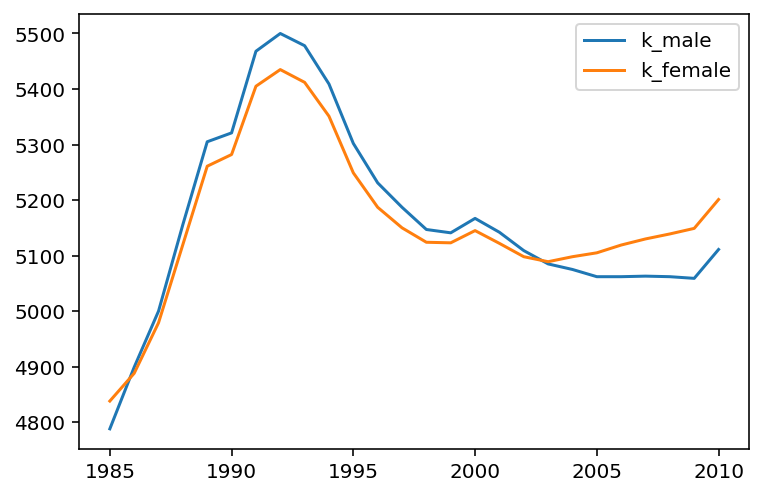

In [26]:
# 시각화
plt.plot(pop['year'], pop[['k_male', 'k_female']])
plt.legend(['k_male', 'k_female'])
plt.show()

## 7.2.데이터프레임 조인(Merge)

- **merge()** 함수를 사용 두 데이터프레임을 지정한 키 값을 기준으로 병합할 수 있습니다.

- 양쪽으로만 붙인다
- 오른쪽 그림은 concat과 동일

<img src='https://raw.githubusercontent.com/Jangrae/img/master/join.png' width=600, align="left"/>

### 7.2.1.데이터 읽어오기

In [27]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head(10)

,year,k_male,k_female
0,1981,4160,4191
1,1982,4160,4191
2,1983,4160,4191
3,1984,4160,4191
4,1985,4160,4191
5,1986,4899,4888
6,1987,5000,4979
7,1988,5156,5120
8,1989,5305,5261
9,1990,5321,5282


In [28]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(10)

,year,f_male,f_female
0,1985,7,6
1,1986,7,5
2,1987,6,5
3,1988,5,5
4,1989,6,5
5,1990,5,4
6,1991,18,14
7,1992,19,16
8,1993,19,17
9,1994,21,19


### 7.2.2.inner 조인

- 같은 이름의 열이 있으면 on 옵션을 지정하지 않아도 그 열을 기준으로 조인됩니다.
- 그래도 기준 열을 명시적으로 지정해 주기를 권고합니다.
- how='inner' 옵션은 기본 옵션값이므로 생략할 수 있습니다.

In [31]:
# 조인
pop = pd.merge(pop01, pop02, on='year', how='inner')

# 확인
pop.head(10)

,year,k_male,k_female,f_male,f_female
0,1985,4160,4191,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


### 7.2.3.outer 조인

- how='outer' 옵션을 지정합니다.

In [35]:
# 조인
pop = pd.merge(pop01, pop02, on='year', how='outer')

# 확인
pop.head()

,year,k_male,k_female,f_male,f_female
0,1981,4160,4191,NaN,NaN
1,1982,4160,4191,NaN,NaN
2,1983,4160,4191,NaN,NaN
3,1984,4160,4191,NaN,NaN
4,1985,4160,4191,7.0,6.0
